In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 3)})

In [2]:
data = pd.read_csv("BATADAL_dataset03.csv")
dataA = pd.read_csv("BATADAL_dataset04.csv")
data["DATETIME"]= pd.to_datetime(data["DATETIME"])
dat = data.set_index('DATETIME')
dataA["DATETIME"]= pd.to_datetime(dataA["DATETIME"])
datA = dataA.set_index('DATETIME')
series=data["L_T1"].values
seriesA = dataA[" L_T1"].values

In [3]:
dat.index

DatetimeIndex(['2014-06-01 00:00:00', '2014-06-01 01:00:00',
               '2014-06-01 02:00:00', '2014-06-01 03:00:00',
               '2014-06-01 04:00:00', '2014-06-01 05:00:00',
               '2014-06-01 06:00:00', '2014-06-01 07:00:00',
               '2014-06-01 08:00:00', '2014-06-01 09:00:00',
               ...
               '2015-05-01 15:00:00', '2015-05-01 16:00:00',
               '2015-05-01 17:00:00', '2015-05-01 18:00:00',
               '2015-05-01 19:00:00', '2015-05-01 20:00:00',
               '2015-05-01 21:00:00', '2015-05-01 22:00:00',
               '2015-05-01 23:00:00', '2015-06-01 00:00:00'],
              dtype='datetime64[ns]', name='DATETIME', length=8761, freq=None)

In [4]:
datA.index

DatetimeIndex(['2016-04-07 00:00:00', '2016-04-07 01:00:00',
               '2016-04-07 02:00:00', '2016-04-07 03:00:00',
               '2016-04-07 04:00:00', '2016-04-07 05:00:00',
               '2016-04-07 06:00:00', '2016-04-07 07:00:00',
               '2016-04-07 08:00:00', '2016-04-07 09:00:00',
               ...
               '2016-12-24 15:00:00', '2016-12-24 16:00:00',
               '2016-12-24 17:00:00', '2016-12-24 18:00:00',
               '2016-12-24 19:00:00', '2016-12-24 20:00:00',
               '2016-12-24 21:00:00', '2016-12-24 22:00:00',
               '2016-12-24 23:00:00', '2016-12-25 00:00:00'],
              dtype='datetime64[ns]', name='DATETIME', length=4177, freq=None)

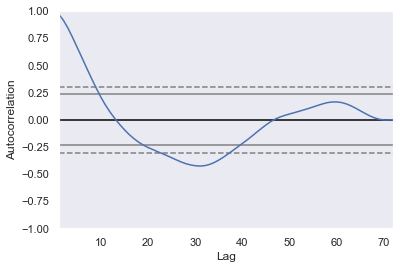

In [5]:
autocorrelation_plot(seriesA[:72])
plt.show()

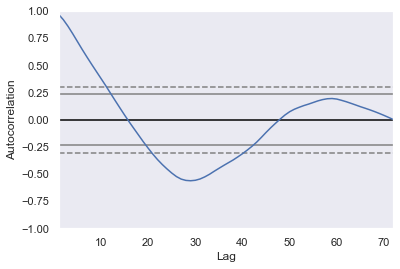

In [6]:
autocorrelation_plot(series[:72])
plt.show()

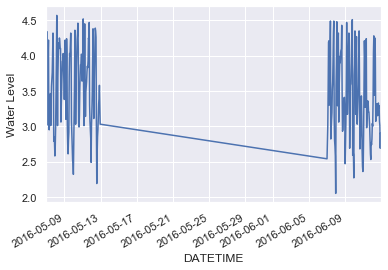

In [7]:
#Training Data 2 Signal
ax = datA.loc['2016-05-01':'2016-06-15', ' L_T4'].plot( linestyle='-',label="Daily")
ax.set_ylabel('Water Level');

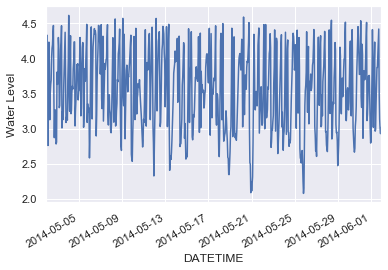

In [8]:
# Training data 1 signal. 
ax = dat.loc['2014-05-01':'2014-06-1', 'L_T4'].plot( linestyle='-',label="Daily")
ax.set_ylabel('Water Level');

In [11]:
# Differencing required if non stationary. It's stationary if p val >0.05. 
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -20.615633
p-value: 0.000000


In [12]:
# Differencing required if non stationary. It's stationary if p val >0.05. 
result = adfuller(seriesA)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.535737
p-value: 0.000000


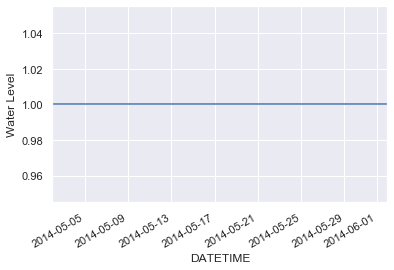

In [13]:
ax = dat.loc['2014-05-01':'2014-06-01', 'S_PU1'].plot( linestyle='-',label="Daily")
ax.set_ylabel('Water Level');

In [256]:
# Differencing required if non stationary. It's stationary if p val >0.05. 
for i in range((dat.shape[1])):
    print(dat.columns[i])
    result = adfuller(dat.iloc[:,i])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


L_T1
ADF Statistic: -20.615633
p-value: 0.000000
L_T2
ADF Statistic: -18.612726
p-value: 0.000000
L_T3
ADF Statistic: -14.375782
p-value: 0.000000
L_T4
ADF Statistic: -16.582866
p-value: 0.000000
L_T5
ADF Statistic: -18.509403
p-value: 0.000000
L_T6
ADF Statistic: -18.364822
p-value: 0.000000
L_T7
ADF Statistic: -17.489711
p-value: 0.000000
F_PU1
ADF Statistic: -27.596471
p-value: 0.000000
S_PU1
ADF Statistic: nan
p-value: nan
F_PU2
ADF Statistic: -27.586431
p-value: 0.000000
S_PU2
ADF Statistic: -27.562711
p-value: 0.000000
F_PU3
ADF Statistic: nan
p-value: nan
S_PU3
ADF Statistic: nan
p-value: nan
F_PU4
ADF Statistic: -14.643662
p-value: 0.000000
S_PU4
ADF Statistic: -14.733583
p-value: 0.000000
F_PU5
ADF Statistic: nan
p-value: nan
S_PU5
ADF Statistic: nan
p-value: nan
F_PU6
ADF Statistic: -41.174938
p-value: 0.000000
S_PU6
ADF Statistic: -41.270903
p-value: 0.000000
F_PU7
ADF Statistic: -16.746262
p-value: 0.000000
S_PU7
ADF Statistic: -16.872092
p-value: 0.000000
F_PU8
ADF Statist

In [257]:
# Differencing required if non stationary. It's stationary if p val >0.05. 
for i in range((datA.shape[1])):
    print(datA.columns[i])
    result = adfuller(datA.iloc[:,i])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

 L_T1
ADF Statistic: -15.535737
p-value: 0.000000
 L_T2
ADF Statistic: -11.593365
p-value: 0.000000
 L_T3
ADF Statistic: -12.358874
p-value: 0.000000
 L_T4
ADF Statistic: -11.344067
p-value: 0.000000
 L_T5
ADF Statistic: -11.884362
p-value: 0.000000
 L_T6
ADF Statistic: -14.719612
p-value: 0.000000
 L_T7
ADF Statistic: -11.798303
p-value: 0.000000
 F_PU1
ADF Statistic: -19.256288
p-value: 0.000000
 S_PU1
ADF Statistic: nan
p-value: nan
 F_PU2
ADF Statistic: -20.035399
p-value: 0.000000
 S_PU2
ADF Statistic: -19.923801
p-value: 0.000000
 F_PU3
ADF Statistic: nan
p-value: nan
 S_PU3
ADF Statistic: nan
p-value: nan
 F_PU4
ADF Statistic: -10.565645
p-value: 0.000000
 S_PU4
ADF Statistic: -10.745166
p-value: 0.000000
 F_PU5
ADF Statistic: nan
p-value: nan
 S_PU5
ADF Statistic: nan
p-value: nan
 F_PU6
ADF Statistic: -5.526860
p-value: 0.000002
 S_PU6
ADF Statistic: -5.336197
p-value: 0.000005
 F_PU7
ADF Statistic: -5.303342
p-value: 0.000005
 S_PU7
ADF Statistic: -5.455861
p-value: 0.000003


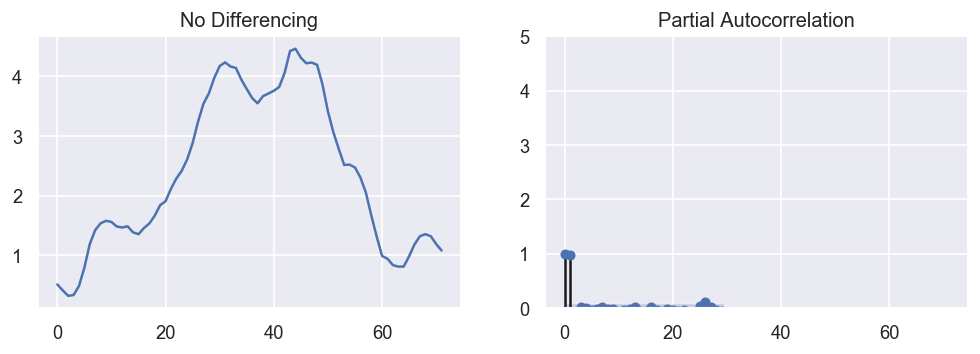

In [14]:
# PACF plot of series to get order for AR. 
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.L_T1[:72]); axes[0].set_title('No Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data.L_T1[:720], ax=axes[1])

plt.show()

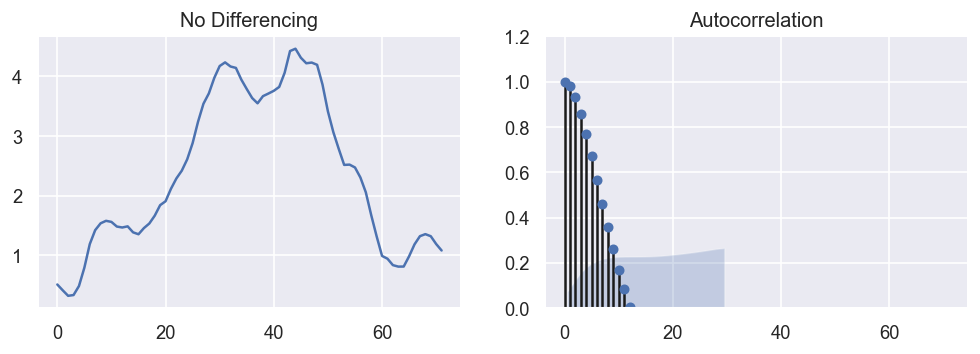

In [15]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.L_T1[:72]); axes[0].set_title('No Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(data.L_T1[:720], ax=axes[1])

plt.show()

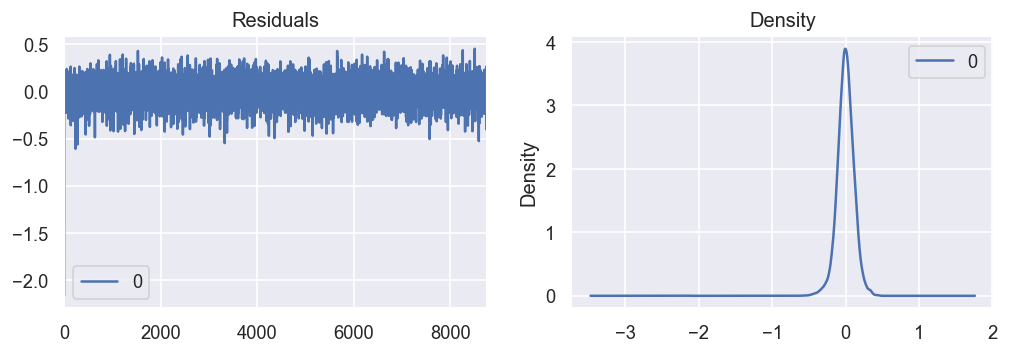

In [262]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

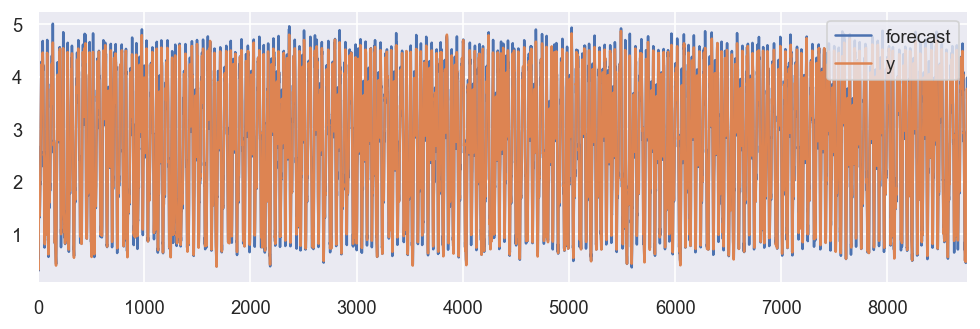

In [263]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [244]:
# Create Training and Test
train = series
test = seriesA

In [276]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})



C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


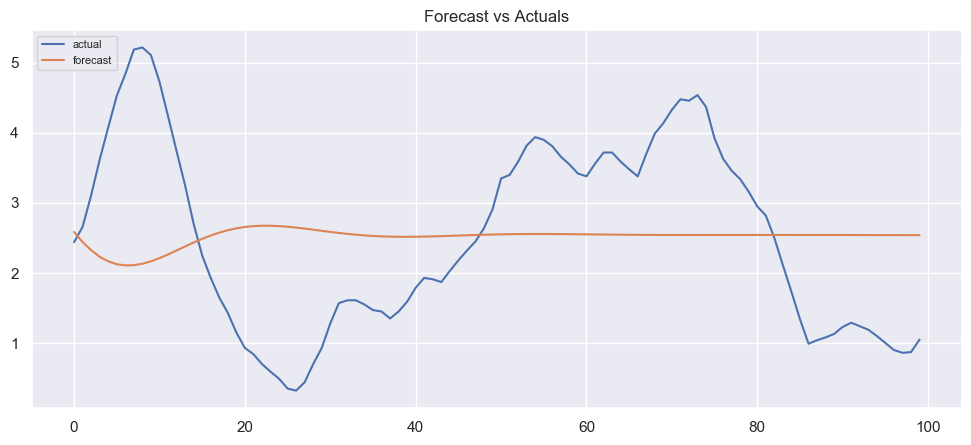

In [283]:
# Build Model
model = ARIMA(train, order=(4,2,4))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(test.shape[0], alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc[:100], index=dataA.index[:100])
#lower_series = pd.Series(conf[:, 0], index=dataA.index[:100])
#upper_series = pd.Series(conf[:, 1], index=dataA.index[:100])

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test[:100], label='actual')
plt.plot(fc_series[:100], label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
            #     color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [284]:
forecast_accuracy(fc, test)

{'mape': 0.5233410110977275,
 'me': -0.6279449291013399,
 'mae': 1.1838085263136053,
 'mpe': 0.03613993699621737,
 'rmse': 1.3981527726573835,
 'acf1': 0.9801572583452416,
 'corr': 0.0037374470931396163,
 'minmax': 0.37227743135855085}

In [ ]:
train = series
errors=[]
test = seriesA
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,0,3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    #input(output)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [9]:
import pmdarima as pm


model = pm.auto_arima(series, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=-7752.456, BIC=-7724.143, Time=3.935 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=28103.160, BIC=28117.316, Time=0.138 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=-558.086, BIC=-536.852, Time=0.535 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=16531.825, BIC=16553.059, Time=2.071 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=43729.179, BIC=43736.258, Time=0.062 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=-13266.336, BIC=-13230.946, Time=4.700 seconds
Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True]; AIC=-13038.322, BIC=-13010.009, Time=1.495 seconds
Fit ARIMA(3,0,1)x(0,0,0,0) [intercept=True]; AIC=-13277.968, BIC=-13235.500, Time=5.150 seconds
Fit ARIMA(3,0,0)x(0,0,0,0) [intercept=True]; AIC=-13229.084, BIC=-13193.693, Time=1.972 seconds
Fit ARIMA(3,0,2)x(0,0,0,0) [intercept=True]; AIC=-13267.957, BIC=-13218.411, Time=6.442 seconds
Fit ARIM

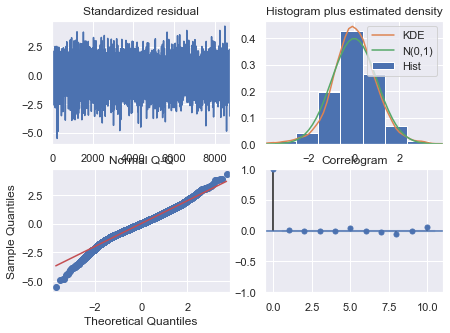

In [10]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s forecast.

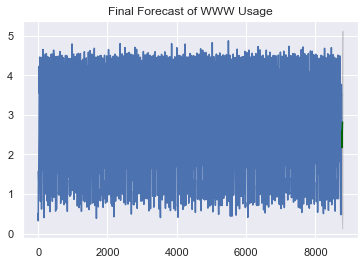

In [22]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(series), len(series)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(series)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()


In [23]:
# Forecast
n_periods = seriesA.shape[0]
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)

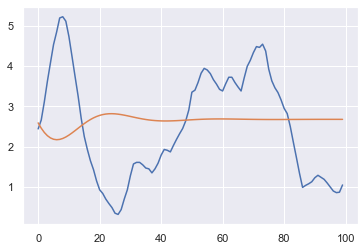

In [26]:
plt.plot(seriesA[:100])
plt.plot(fc[:100])

In [28]:
residuals=(fc-seriesA)**2

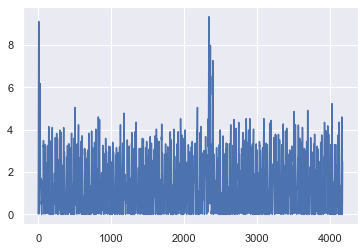

In [32]:
plt.plot(residuals)